In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Customer Churn (1).csv")

In [21]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replaced Blanks with 0 as tenure 0 and no total charges are recoreded

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

# Checked if we had null Values,Blanks or Duplicates and completed inspection of our data. 

In [11]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df[ 'SeniorCitizen' ] =df["SeniorCitizen"].apply(conv)

In [12]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#converted 0 and 1 value of senior citizens to Yes/No to make it easire to unserstand 

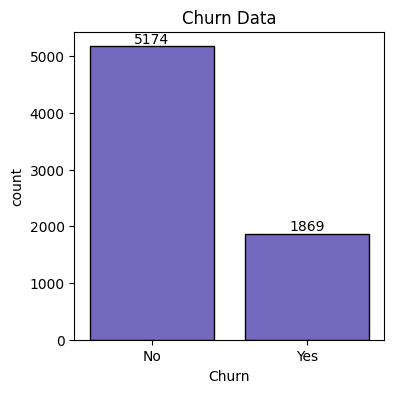

In [45]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Churn',data = df,color="slateblue",edgecolor="black")
ax.bar_label(ax.containers[0])
plt.title("Churn Data")
plt.show()

#The BarGraph showcases that 1869 customers have opted to Churn out.

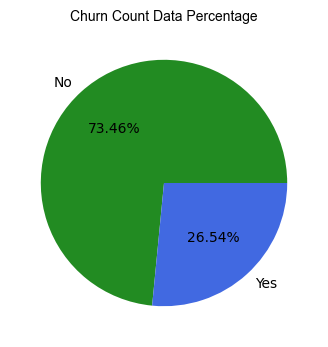

In [43]:
plt.figure(figsize=(4,4))
plt.title("Churn Count Data Percentage",size = 10,font = "Arial")
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index,autopct="%1.2f%%",colors=['Forestgreen', 'Royalblue'])
plt.show()

#From the given Pie Chart we can conclude thta 26.54% of the customers have churned out.
Now lets explore the reasons behind it.

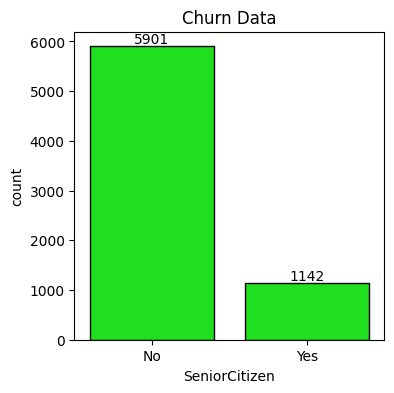

In [22]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'SeniorCitizen',data = df,color="lime",edgecolor="black")
ax.bar_label(ax.containers[0])
plt.title("Churn Data")
plt.show()

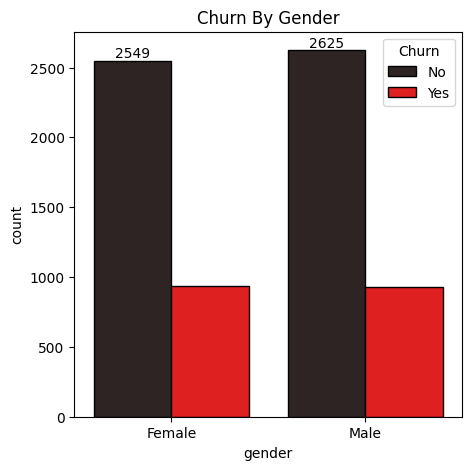

In [26]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "gender", data = df, hue = "Churn",color="Red",edgecolor="Black")

ax.bar_label(ax.containers[0])
plt.title("Churn By Gender")
plt.show()

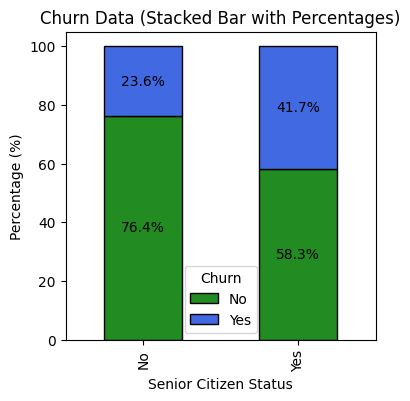

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the counts for each SeniorCitizen group and Churn status
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate the percentage of each Churn status within each SeniorCitizen group
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with percentages
churn_percentages.plot(kind='bar', stacked=True, color=['forestgreen', 'royalblue'], edgecolor="black", figsize=(4, 4))

# Add title and labels
plt.title("Churn Data (Stacked Bar with Percentages)")
plt.xlabel("Senior Citizen Status")
plt.ylabel("Percentage (%)")

# Show the percentage labels on the bars
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    percentage = f'{height:.1f}%'
    plt.text(x, y, percentage, ha='center', va='center')

plt.show()

#Comperatively a greater percentage of people in Senior Citizens have churned.

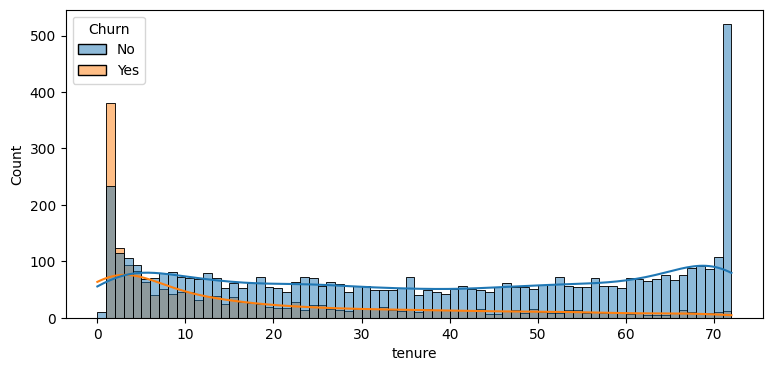

In [28]:
plt.figure(figsize=(9, 4))
sns.histplot(x="tenure", data=df, bins=72,hue ="Churn", kde=True)
plt.show()

#People who have used our services for a longer time have stayed and people who have used our services for a shorter period have churned

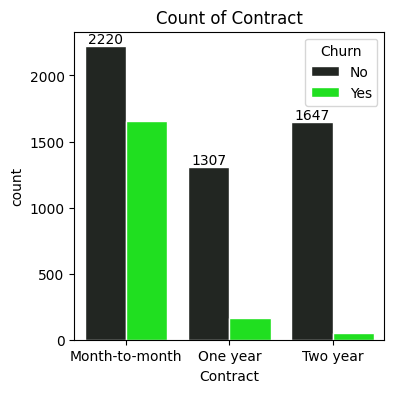

In [29]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract',data = df,hue="Churn",color="Lime",edgecolor="white")
ax.bar_label(ax.containers[0])
plt.title("Count of Contract")
plt.show()

#People who have month to month contract are likely to churn then from those who have 1 or 2 years contract.

In [30]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

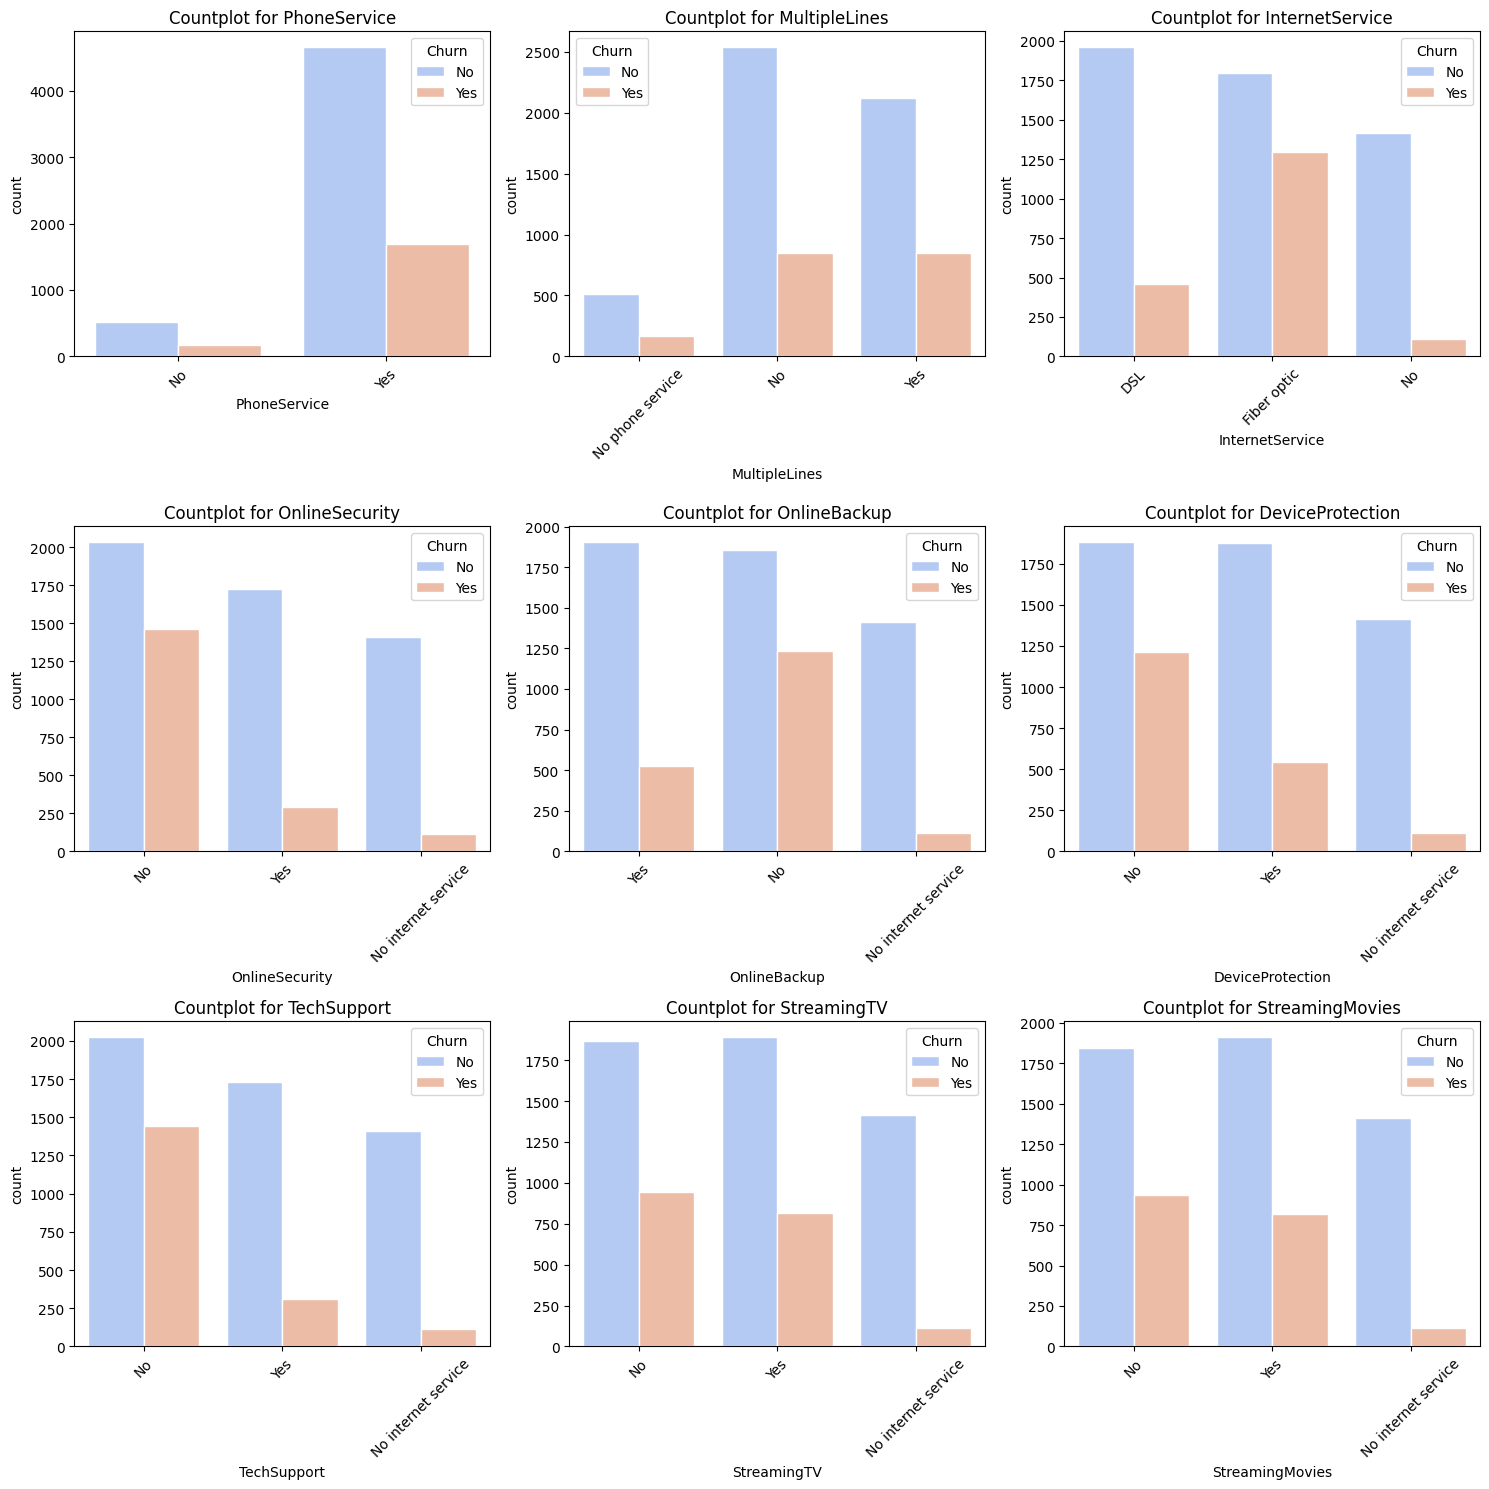

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust the number of rows and columns as needed

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Loop over the columns and create a countplot for each one
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue='Churn', palette='coolwarm', edgecolor='white')
    axes[i].set_title(f'Countplot for {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


#The visualizations summarize the distribution of customer churn across various service categories such as PhoneService, InternetService, OnlineSecurity, and StreamingTV. Customers with certain services, like OnlineSecurity or TechSupport, appear less likely to churn, while those without these services show higher churn rates. This highlights potential factors influencing churn, such as lack of essential or value-added services.